### Deep Learning Project


- André Silva, 20230972
- Catarina Reis, 20230981
- Diogo Almeida, 20230737
- João Gonçalves, 20230560
- João Pedro Mota, 20230454

In [1]:
import os
import shutil
import math
from io import BytesIO

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, utils, callbacks, optimizers, losses, metrics
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, DenseNet121, ResNet101
from tensorflow.keras.regularizers import L2
from keras.metrics import F1Score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from PIL import Image

import requests
import pickle

tf.random.set_seed(42)

In [23]:
train_dir = r"C:\Users\andre\OneDrive\Documentos\Nova_IMS\1_ano\2_semestre\Deep Learning\Project\Projeto\data\train" 
validation_dir = r"C:\Users\andre\OneDrive\Documentos\Nova_IMS\1_ano\2_semestre\Deep Learning\Project\Projeto\data\validation"
test_dir = r"C:\Users\andre\OneDrive\Documentos\Nova_IMS\1_ano\2_semestre\Deep Learning\Project\Projeto\data\test"

# VGG16 Fine-tuning the Last Few Layers:

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='categorical')  

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='categorical')

Found 11727 images belonging to 114 classes.
Found 2483 images belonging to 114 classes.


In [15]:
for layer in vgg16_base.layers[:-4]:
    layer.trainable = False

# Add classification head
x = Flatten()(vgg16_base.output)
x = Dense(512, activation='relu')(x)
output = Dense(114, activation='softmax')(x)

# Create model
model = Model(inputs=vgg16_base.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001),  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history= model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
    )

Epoch 1/20


c:\Users\jgonc\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


367/367 ━━━━━━━━━━━━━━━━━━━━ 343s 930ms/step - accuracy: 0.0492 - loss: 4.5095 - val_accuracy: 0.0967 - val_loss: 4.1675
Epoch 2/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 341s 928ms/step - accuracy: 0.1127 - loss: 4.0611 - val_accuracy: 0.1120 - val_loss: 3.9947
Epoch 3/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 339s 921ms/step - accuracy: 0.1410 - loss: 3.8536 - val_accuracy: 0.1389 - val_loss: 3.8726
Epoch 4/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 340s 922ms/step - accuracy: 0.1654 - loss: 3.6790 - val_accuracy: 0.1563 - val_loss: 3.7814
Epoch 5/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 339s 921ms/step - accuracy: 0.1846 - loss: 3.5619 - val_accuracy: 0.1603 - val_loss: 3.7619
Epoch 6/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 340s 923ms/step - accuracy: 0.2007 - loss: 3.4672 - val_accuracy: 0.1683 - val_loss: 3.7258
Epoch 7/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 340s 923ms/step - accuracy: 0.2346 - loss: 3.3261 - val_accuracy: 0.1716 - val_loss: 3.7048
Epoch 8/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 339s 922ms/step - accuracy: 0.2314 - loss: 3.29

# Save history

In [16]:
with open('history_finetune.pkl', 'wb') as f:
    pickle.dump(history.history, f)


# Load History

In [17]:
with open('history_finetune.pkl', 'rb') as f:
    history = pickle.load(f)

# Save Model

In [18]:
model.save("VGG16_Fine-tuning.h5")


# Load model 

In [19]:
model = load_model("VGG16_Fine-tuning.h5")

# Graphs

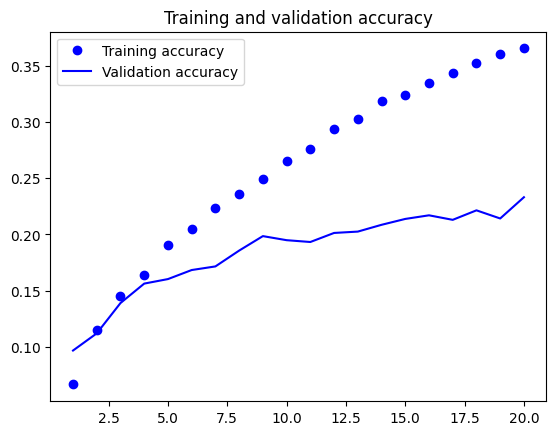

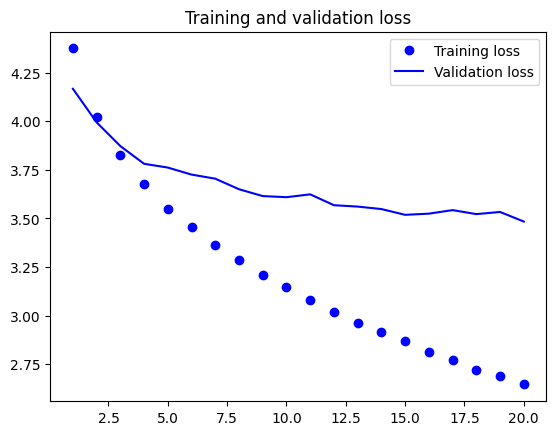

In [20]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Test the model

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical',  
    shuffle=False
)


Found 2480 images belonging to 114 classes.


In [22]:
predictions = model.predict(test_generator, steps=len(test_generator))
true_labels = test_generator.classes  

predicted_labels = predictions.argmax(axis=-1)


78/78 ━━━━━━━━━━━━━━━━━━━━ 54s 692ms/step


In [23]:
accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 22.78%


In [24]:
weighted_f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("Weighted F1 Score: {:.4f}".format(weighted_f1))

Weighted F1 Score: 0.2092


# VGG16 Transfer Learning:

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='categorical')  

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='categorical')

Found 11727 images belonging to 114 classes.
Found 2483 images belonging to 114 classes.


In [26]:
# Remove last layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
output = vgg16_base.layers[-1].output
output = Flatten()(output)
# Add custom fully connected layers
output = Dense(512, activation='relu')(output)
output = Dense(114, activation='softmax')(output)

# Create model
model = Model(inputs=vgg16_base.input, outputs=output)

# Freeze all layers of VGG16
for layer in vgg16_base.layers:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=0.0001),  
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)
history= model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
    )


Epoch 1/20


c:\Users\jgonc\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


367/367 ━━━━━━━━━━━━━━━━━━━━ 335s 908ms/step - accuracy: 0.0525 - loss: 4.5071 - val_accuracy: 0.0938 - val_loss: 4.1751
Epoch 2/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 333s 906ms/step - accuracy: 0.1095 - loss: 4.0587 - val_accuracy: 0.1192 - val_loss: 3.9774
Epoch 3/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 337s 916ms/step - accuracy: 0.1442 - loss: 3.8410 - val_accuracy: 0.1398 - val_loss: 3.8918
Epoch 4/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 333s 903ms/step - accuracy: 0.1731 - loss: 3.6815 - val_accuracy: 0.1498 - val_loss: 3.8095
Epoch 5/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 334s 908ms/step - accuracy: 0.1934 - loss: 3.5390 - val_accuracy: 0.1647 - val_loss: 3.7407
Epoch 6/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 334s 907ms/step - accuracy: 0.2082 - loss: 3.4535 - val_accuracy: 0.1615 - val_loss: 3.7367
Epoch 7/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 334s 907ms/step - accuracy: 0.2248 - loss: 3.3407 - val_accuracy: 0.1716 - val_loss: 3.6889
Epoch 8/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 334s 908ms/step - accuracy: 0.2393 - loss: 3.26

# Save history

In [27]:
with open('history_transferlearn.pkl', 'wb') as f:
    pickle.dump(history.history, f)


# Load History

In [28]:
with open('history_transferlearn.pkl', 'rb') as f:
    history = pickle.load(f)

# Save Model

In [29]:
model.save("VGG16_TransferLearning.h5")


# Load model 

In [30]:
model = load_model("VGG16_TransferLearning.h5")

# Graphs

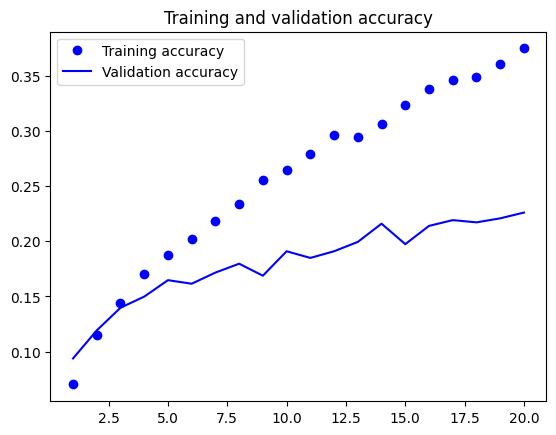

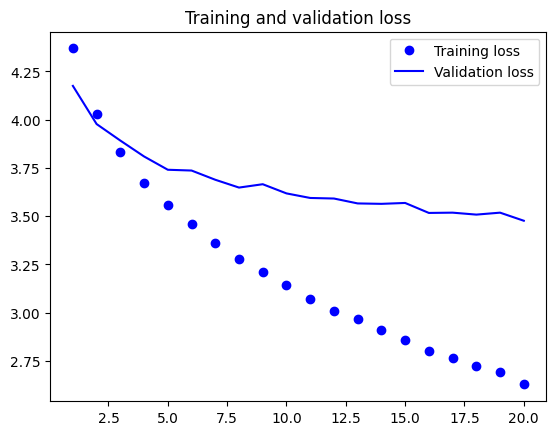

In [31]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Test the model

In [32]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical',  
    shuffle=False  
)


Found 2480 images belonging to 114 classes.


In [33]:
predictions = model.predict(test_generator, steps=len(test_generator))
true_labels = test_generator.classes  

predicted_labels = predictions.argmax(axis=-1)


78/78 ━━━━━━━━━━━━━━━━━━━━ 55s 697ms/step


In [34]:
accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 22.74%


In [35]:
weighted_f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("Weighted F1 Score: {:.4f}".format(weighted_f1))

Weighted F1 Score: 0.2081


# ResNet101

In [36]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
NUM_CLASSES = 114

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 11727 images belonging to 114 classes.
Found 2483 images belonging to 114 classes.


In [38]:
def create_resnet(num_classes=114):
    base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs=base_model.input, outputs=outputs)
    
    return model

# Create the model
model = create_resnet(114)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
)

Epoch 1/20


c:\Users\jgonc\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


367/367 ━━━━━━━━━━━━━━━━━━━━ 516s 1s/step - accuracy: 0.0270 - loss: 4.5762 - val_accuracy: 0.0395 - val_loss: 4.4978
Epoch 2/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 498s 1s/step - accuracy: 0.0366 - loss: 4.4963 - val_accuracy: 0.0379 - val_loss: 4.4799
Epoch 3/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 498s 1s/step - accuracy: 0.0429 - loss: 4.4712 - val_accuracy: 0.0387 - val_loss: 4.4505
Epoch 4/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - accuracy: 0.0412 - loss: 4.4681 - val_accuracy: 0.0379 - val_loss: 4.4486
Epoch 5/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - accuracy: 0.0387 - loss: 4.4522 - val_accuracy: 0.0455 - val_loss: 4.4412
Epoch 6/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 496s 1s/step - accuracy: 0.0399 - loss: 4.4533 - val_accuracy: 0.0379 - val_loss: 4.4442
Epoch 7/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - accuracy: 0.0445 - loss: 4.4397 - val_accuracy: 0.0451 - val_loss: 4.4289
Epoch 8/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - accuracy: 0.0437 - loss: 4.4370 - val_accuracy: 0.041

# Save history

In [70]:
with open('historyresnet.pkl', 'wb') as f:
    pickle.dump(history.history, f)


# Load History

In [71]:
with open('historyresnet.pkl', 'rb') as f:
    history = pickle.load(f)

# Save Model

In [41]:
model.save("ResNet101.h5")


# Load model 

In [42]:
model = load_model("ResNet101.h5")

# Graphs

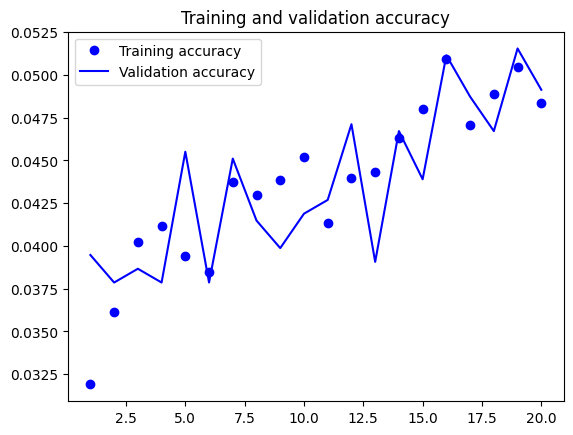

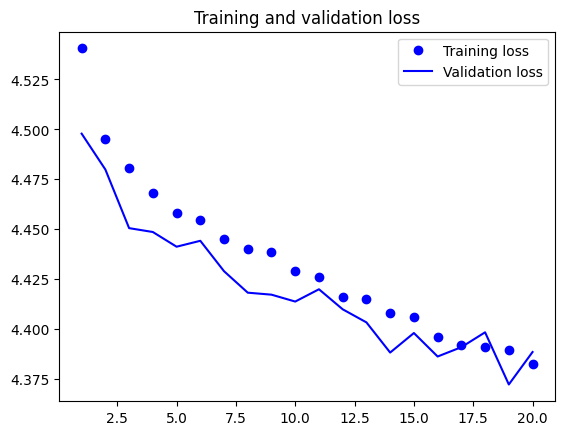

In [43]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Test the model

In [44]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical',  
    shuffle=False  
)


Found 2480 images belonging to 114 classes.


In [45]:
predictions = model.predict(test_generator, steps=len(test_generator))
true_labels = test_generator.classes  

predicted_labels = predictions.argmax(axis=-1)


78/78 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step


In [46]:
accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 4.80%


In [47]:
weighted_f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("Weighted F1 Score: {:.4f}".format(weighted_f1))

Weighted F1 Score: 0.0165


# DenseNet121

In [87]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='categorical')  

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='categorical') 

Found 11727 images belonging to 114 classes.
Found 2483 images belonging to 114 classes.


In [88]:
input_shape = (150, 150, 3)  
num_classes = 114

base_model = DenseNet121(
    include_top=False, 
    weights='imagenet', 
    input_shape=input_shape
)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

In [89]:
model.compile(
    optimizer=Adam(learning_rate=0.001),  
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)
historydensenet=model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
    )

Epoch 1/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 376s 999ms/step - accuracy: 0.0923 - loss: 4.3084 - val_accuracy: 0.1615 - val_loss: 3.6937
Epoch 2/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 361s 981ms/step - accuracy: 0.2077 - loss: 3.3700 - val_accuracy: 0.2054 - val_loss: 3.4467
Epoch 3/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 389s 1s/step - accuracy: 0.2649 - loss: 3.0419 - val_accuracy: 0.2118 - val_loss: 3.4108
Epoch 4/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.3129 - loss: 2.7968 - val_accuracy: 0.2356 - val_loss: 3.3228
Epoch 5/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 427s 1s/step - accuracy: 0.3518 - loss: 2.6199 - val_accuracy: 0.2553 - val_loss: 3.2504
Epoch 6/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 428s 1s/step - accuracy: 0.3910 - loss: 2.4197 - val_accuracy: 0.2658 - val_loss: 3.2429
Epoch 7/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 427s 1s/step - accuracy: 0.4100 - loss: 2.3020 - val_accuracy: 0.2702 - val_loss: 3.2379
Epoch 8/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 424s 1s/step - accuracy: 0.4569 - loss: 2.1226 - va

# Save history

In [90]:
with open('historydensenet.pkl', 'wb') as f:
    pickle.dump(historydensenet.history, f)


# Load History

In [91]:
with open('historydensenet.pkl', 'rb') as f:
    history = pickle.load(f)

# Save Model

In [92]:
model.save("DenseNet121.h5")


# Load model 

In [93]:
model = load_model("DenseNet121.h5")

# Graphs

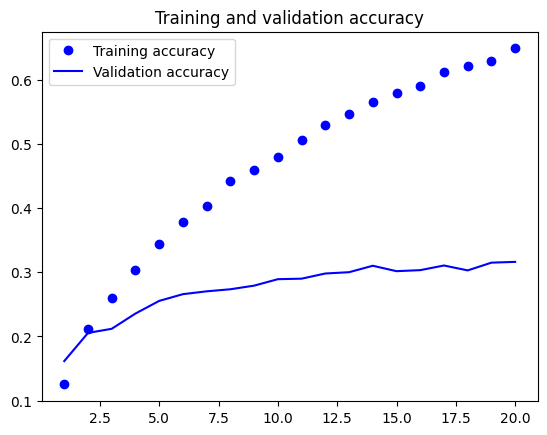

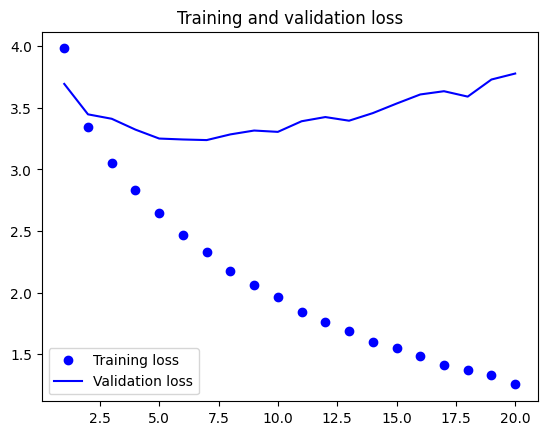

In [94]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Test the model

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical',  
    shuffle=False  
)


Found 2480 images belonging to 114 classes.


In [96]:
predictions = model.predict(test_generator, steps=len(test_generator))
true_labels = test_generator.classes  

predicted_labels = predictions.argmax(axis=-1)


78/78 ━━━━━━━━━━━━━━━━━━━━ 65s 803ms/step


In [97]:
accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 31.01%


In [98]:
weighted_f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("Weighted F1 Score: {:.4f}".format(weighted_f1))

Weighted F1 Score: 0.3066


# Custom CNN Model

In [28]:
train_datagen6 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=0.275,
    horizontal_flip=False,
    vertical_flip=False,
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
    )

train_generator6 = train_datagen6.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64, #100
    class_mode='categorical')  # For multiclass classification

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='categorical') 

model6 = Sequential()
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=L2(0.001), input_shape=(150, 150, 3), padding="same"))
model6.add(MaxPooling2D((2, 2)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=L2(0.001), padding='same'))
model6.add(MaxPooling2D((2, 2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.15))

model6.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(0.001)))
model6.add(MaxPooling2D((2, 2)))
model6.add(BatchNormalization())
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(0.001)))
model6.add(MaxPooling2D((2, 2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.2))

model6.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=L2(0.001)))
model6.add(MaxPooling2D((2, 2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.25))


model6.add(Flatten())
model6.add(Dense(256, activation='relu'))
model6.add(Dropout(0.15))
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.2))

model6.add(Dense(114, activation='softmax'))

opt6 = Adam(learning_rate=0.0001)
model6.compile(optimizer=opt6, loss='categorical_crossentropy', metrics=["accuracy"])

callbacks_list6 = [
    ModelCheckpoint(
        filepath='models\\model6.keras',
        monitor='val_loss',
        save_best_only=True, verbose=1),
    ModelCheckpoint(
        filepath='models\\model6_weighted_f1.keras',
        monitor='val_weighted_f1',
        save_best_only=True, verbose=1),
]

history6 = model6.fit(
    train_generator6,
    epochs=100,
    callbacks=callbacks_list6,
    batch_size=32,
    validation_data=validation_generator,
)


Found 11727 images belonging to 114 classes.
Found 2483 images belonging to 114 classes.
Epoch 1/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.0172 - loss: 5.2236
Epoch 1: val_loss improved from inf to 4.89103, saving model to models\model6.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 176s 914ms/step - accuracy: 0.0172 - loss: 5.2229 - val_accuracy: 0.0213 - val_loss: 4.8910
Epoch 2/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 844ms/step - accuracy: 0.0281 - loss: 4.9105
Epoch 2: val_loss improved from 4.89103 to 4.80226, saving model to models\model6.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 170s 906ms/step - accuracy: 0.0281 - loss: 4.9103 - val_accuracy: 0.0346 - val_loss: 4.8023
Epoch 3/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.0340 - loss: 4.8032
Epoch 3: val_loss improved from 4.80226 to 4.70862, saving model to models\model6.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 172s 920ms/step - accuracy: 0.0340 - loss: 4.8031 - val_accuracy: 0.0451 - val_loss: 4.7086
Epoch 4/100
184/184 ━

In [29]:
model6.save('models\\model6_trained_until_end.keras')

# Graphs

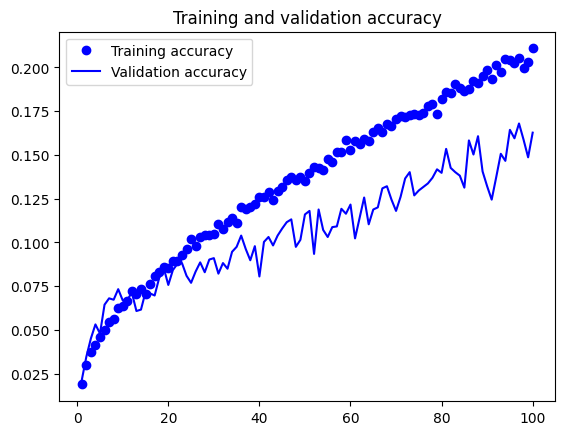

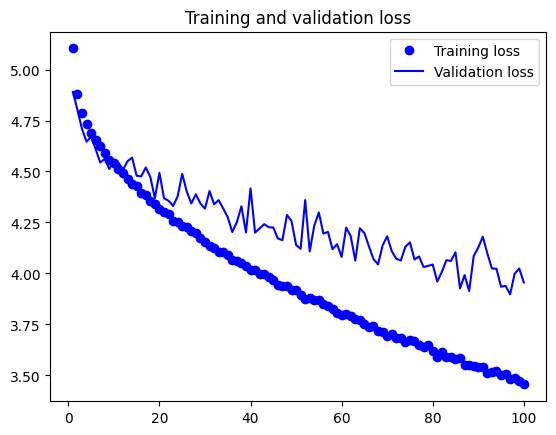

In [30]:
acc = history6.history['accuracy']

val_acc = history6.history['val_accuracy']

loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Test the model

In [31]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical',  
    shuffle=False  
)


Found 2480 images belonging to 114 classes.


In [33]:
predictions = model6.predict(test_generator, steps=len(test_generator))
true_labels = test_generator.classes  

predicted_labels = predictions.argmax(axis=-1)


c:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 ━━━━━━━━━━━━━━━━━━━━ 38s 480ms/step


In [34]:
accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 16.37%


In [35]:
weighted_f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("Weighted F1 Score: {:.4f}".format(weighted_f1))

Weighted F1 Score: 0.1416


# Multi-Input CNN

###### based on the following youtube tutorial: https://www.youtube.com/watch?v=4-O14gOdRso&t=1089s&ab_channel=GregHogg

In [ ]:
train_df_path = os.path.join("data\\Multi_input_data\\train.xlsx")
val_df_path = os.path.join("data\\Multi_input_data\\val.xlsx")
test_df_path = os.path.join("data\\Multi_input_data\\test.xlsx")

df_for_training = pd.read_excel(train_df_path) 

In [ ]:
df_for_training_structured = df_for_training[["fitzpatrick_scale", "nine_partition_label", "three_partition_label","label", "path"]] # adicionar path dps
df_for_training_structured

,fitzpatrick_scale,nine_partition_label,three_partition_label,label,path
0,2,benign dermal,benign,lymphangioma,data_2/train/lymphangioma/lymphangioma_1636.jpg
1,5,genodermatoses,non-neoplastic,ehlers danlos syndrome,data_2/train/ehlers danlos syndrome/ehlers dan...
2,1,benign epidermal,benign,nevus sebaceous of jadassohn,data_2/train/nevus sebaceous of jadassohn/nevu...
3,3,inflammatory,non-neoplastic,xanthomas,data_2/train/xanthomas/xanthomas_7762.jpg
4,1,inflammatory,non-neoplastic,erythema annulare centrifigum,data_2/train/erythema annulare centrifigum/ery...
...,...,...,...,...,...
11168,3,malignant cutaneous lymphoma,malignant,mycosis fungoides,data_2/train/mycosis fungoides/mycosis fungoid...
11169,1,inflammatory,non-neoplastic,acne,data_2/train/acne/acne_8645.jpg
11170,4,inflammatory,non-neoplastic,pediculosis lids,data_2/train/pediculosis lids/pediculosis lids...
11171,5,genodermatoses,non-neoplastic,neurofibromatosis,data_2/train/neurofibromatosis/neurofibromatos...


In [ ]:


df_for_validation = pd.read_excel(val_df_path)
df_for_testing = pd.read_excel(test_df_path)


df_for_validation_structured = df_for_validation[["fitzpatrick_scale", "nine_partition_label", "three_partition_label","label", "path"]]
df_for_testing_structured = df_for_testing[["fitzpatrick_scale", "nine_partition_label", "three_partition_label","label", "path"]]

In [ ]:
# dummies nine_partition_label. leave out inflamatory
train_dummies_9 = pd.get_dummies(df_for_training_structured["nine_partition_label"], prefix="9_partition_label", dtype="int64")
val_dummies_9 = pd.get_dummies(df_for_validation_structured["nine_partition_label"], prefix="9_partition_label", dtype="int64")
test_dummies_9 = pd.get_dummies(df_for_testing_structured["nine_partition_label"], prefix="9_partition_label", dtype="int64")

In [ ]:
train_dummies_9.drop(columns=["9_partition_label_inflammatory"], inplace=True)
val_dummies_9.drop(columns=["9_partition_label_inflammatory"], inplace=True)
test_dummies_9.drop(columns=["9_partition_label_inflammatory"], inplace=True)

In [ ]:
df_for_training_structured.drop(columns=["nine_partition_label"], inplace=True)
df_for_validation_structured.drop(columns=["nine_partition_label"], inplace=True)
df_for_testing_structured.drop(columns=["nine_partition_label"], inplace=True)

C:\Users\joaop\AppData\Local\Temp\ipykernel_8832\3642717710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_training_structured.drop(columns=["nine_partition_label"], inplace=True)
C:\Users\joaop\AppData\Local\Temp\ipykernel_8832\3642717710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_validation_structured.drop(columns=["nine_partition_label"], inplace=True)
C:\Users\joaop\AppData\Local\Temp\ipykernel_8832\3642717710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
df_for_training_structured = df_for_training_structured.join(train_dummies_9)
df_for_validation_structured = df_for_validation_structured.join(val_dummies_9)
df_for_testing_structured = df_for_testing_structured.join(test_dummies_9)

In [ ]:
train_dummies_3 = pd.get_dummies(df_for_training_structured["three_partition_label"], prefix="3_partition_label", dtype="int64")
val_dummies_3 = pd.get_dummies(df_for_validation_structured["three_partition_label"], prefix="3_partition_label", dtype="int64")
test_dummies_3 = pd.get_dummies(df_for_testing_structured["three_partition_label"], prefix="3_partition_label", dtype="int64")

In [ ]:
train_dummies_3.drop(columns=["3_partition_label_non-neoplastic"], inplace=True)
val_dummies_3.drop(columns=["3_partition_label_non-neoplastic"], inplace=True)
test_dummies_3.drop(columns=["3_partition_label_non-neoplastic"], inplace=True)

In [ ]:
df_for_training_structured.drop(columns=["three_partition_label"], inplace=True)
df_for_validation_structured.drop(columns=["three_partition_label"], inplace=True)
df_for_testing_structured.drop(columns=["three_partition_label"], inplace=True)

In [ ]:
df_for_training_structured = df_for_training_structured.join(train_dummies_3)
df_for_validation_structured = df_for_validation_structured.join(val_dummies_3)
df_for_testing_structured = df_for_testing_structured.join(test_dummies_3)

df_for_training_structured

,fitzpatrick_scale,label,path,9_partition_label_benign dermal,9_partition_label_benign epidermal,9_partition_label_benign melanocyte,9_partition_label_genodermatoses,9_partition_label_malignant cutaneous lymphoma,9_partition_label_malignant dermal,9_partition_label_malignant epidermal,9_partition_label_malignant melanoma,3_partition_label_benign,3_partition_label_malignant
0,2,lymphangioma,data_2/train/lymphangioma/lymphangioma_1636.jpg,1,0,0,0,0,0,0,0,1,0
1,5,ehlers danlos syndrome,data_2/train/ehlers danlos syndrome/ehlers dan...,0,0,0,1,0,0,0,0,0,0
2,1,nevus sebaceous of jadassohn,data_2/train/nevus sebaceous of jadassohn/nevu...,0,1,0,0,0,0,0,0,1,0
3,3,xanthomas,data_2/train/xanthomas/xanthomas_7762.jpg,0,0,0,0,0,0,0,0,0,0
4,1,erythema annulare centrifigum,data_2/train/erythema annulare centrifigum/ery...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11168,3,mycosis fungoides,data_2/train/mycosis fungoides/mycosis fungoid...,0,0,0,0,1,0,0,0,0,1
11169,1,acne,data_2/train/acne/acne_8645.jpg,0,0,0,0,0,0,0,0,0,0
11170,4,pediculosis lids,data_2/train/pediculosis lids/pediculosis lids...,0,0,0,0,0,0,0,0,0,0
11171,5,neurofibromatosis,data_2/train/neurofibromatosis/neurofibromatos...,0,0,0,1,0,0,0,0,0,0


In [ ]:
le = LabelEncoder()
df_for_training_structured["label"] = le.fit_transform(df_for_training_structured["label"])
df_for_validation_structured["label"] = le.transform(df_for_validation_structured["label"])
df_for_testing_structured["label"] = le.transform(df_for_testing_structured["label"])

In [ ]:

num_classes = 114

In [ ]:
target_train_structured = df_for_training_structured["label"]
data_for_training_structured = df_for_training_structured.drop(columns=["label"])
target_train_encoded_structured = to_categorical(target_train_structured, num_classes=num_classes)

In [ ]:
paths_train = data_for_training_structured["path"]
data_for_training_structured.drop(columns=["path"], inplace=True)
data_for_training_structured

,fitzpatrick_scale,9_partition_label_benign dermal,9_partition_label_benign epidermal,9_partition_label_benign melanocyte,9_partition_label_genodermatoses,9_partition_label_malignant cutaneous lymphoma,9_partition_label_malignant dermal,9_partition_label_malignant epidermal,9_partition_label_malignant melanoma,3_partition_label_benign,3_partition_label_malignant
0,2,1,0,0,0,0,0,0,0,1,0
1,5,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11168,3,0,0,0,0,1,0,0,0,0,1
11169,1,0,0,0,0,0,0,0,0,0,0
11170,4,0,0,0,0,0,0,0,0,0,0
11171,5,0,0,0,1,0,0,0,0,0,0


In [ ]:
paths_train

0          data_2/train/lymphangioma/lymphangioma_1636.jpg
1        data_2/train/ehlers danlos syndrome/ehlers dan...
2        data_2/train/nevus sebaceous of jadassohn/nevu...
3                data_2/train/xanthomas/xanthomas_7762.jpg
4        data_2/train/erythema annulare centrifigum/ery...
                               ...                        
11168    data_2/train/mycosis fungoides/mycosis fungoid...
11169                      data_2/train/acne/acne_8645.jpg
11170    data_2/train/pediculosis lids/pediculosis lids...
11171    data_2/train/neurofibromatosis/neurofibromatos...
11172    data_2/train/sun damaged skin/sun damaged skin...
Name: path, Length: 11173, dtype: object

In [ ]:
paths_val = df_for_validation["path"]
paths_test = df_for_testing["path"]

In [ ]:
data_for_validation_structured = df_for_validation_structured.drop(columns=["path"])
data_for_testing_structured = df_for_testing_structured.drop(columns=["path"])

In [ ]:
target_val_structured = data_for_validation_structured["label"]
data_for_validation_structured.drop(columns=["label"], inplace=True)
target_val_encoded_structured = to_categorical(target_val_structured, num_classes=num_classes)

In [ ]:
target_test_structured = data_for_testing_structured["label"]
data_for_testing_structured.drop(columns=["label"], inplace=True)
target_test_encoded_structured = to_categorical(target_test_structured, num_classes=num_classes)

In [ ]:
target_test_structured.shape

(2394,)

In [ ]:
target_test_encoded_structured.shape

(2394, 114)

In [ ]:
df_for_training_structured

,fitzpatrick_scale,label,path,9_partition_label_benign dermal,9_partition_label_benign epidermal,9_partition_label_benign melanocyte,9_partition_label_genodermatoses,9_partition_label_malignant cutaneous lymphoma,9_partition_label_malignant dermal,9_partition_label_malignant epidermal,9_partition_label_malignant melanoma,3_partition_label_benign,3_partition_label_malignant
0,2,54,data_2/train/lymphangioma/lymphangioma_1636.jpg,1,0,0,0,0,0,0,0,1,0
1,5,23,data_2/train/ehlers danlos syndrome/ehlers dan...,0,0,0,1,0,0,0,0,0,0
2,1,70,data_2/train/nevus sebaceous of jadassohn/nevu...,0,1,0,0,0,0,0,0,1,0
3,3,112,data_2/train/xanthomas/xanthomas_7762.jpg,0,0,0,0,0,0,0,0,0,0
4,1,26,data_2/train/erythema annulare centrifigum/ery...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11168,3,60,data_2/train/mycosis fungoides/mycosis fungoid...,0,0,0,0,1,0,0,0,0,1
11169,1,1,data_2/train/acne/acne_8645.jpg,0,0,0,0,0,0,0,0,0,0
11170,4,73,data_2/train/pediculosis lids/pediculosis lids...,0,0,0,0,0,0,0,0,0,0
11171,5,66,data_2/train/neurofibromatosis/neurofibromatos...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# all rows equals! success.

In [ ]:
# minMax = MinMaxScaler()
# df_for_training_structured["fitzpatrick_scale"] = minMax.fit_transform(df_for_training_structured["fitzpatrick_scale"].values.reshape(-1, 1))
# df_for_training_structured.columns

# df_for_validation_structured["fitzpatrick_scale"] = minMax.transform(df_for_validation_structured["fitzpatrick_scale"].values.reshape(-1, 1))
# df_for_testing_structured["fitzpatrick_scale"] = minMax.transform(df_for_testing_structured["fitzpatrick_scale"].values.reshape(-1, 1))

In [ ]:
# o npz mistura uma compressão de um array de numpy mas também funciona como uma especie de dicionariio,
# quer isto dizer que podemos chegar a uma "coluna" dizendo quero o valor na 
# coluna que se chama _______ do ficheiro _____.npz
# cada ficheiro npz corresponde a uma row.
npz_paths = []
a = 0 # já não é usado
for i, row in df_for_training_structured.iterrows():
   # vamos bsucar o caminho parcial da imagem a cada row
   picture_path = row["path"]

   ftzps, nBDermal, nBEpidermal, \
      nBMelan, nGenoderm, nMCutan, \
      nMDerm, nMEpiderm, nMMelan, \
      tBenign, tMalign =  row[['fitzpatrick_scale', '9_partition_label_benign dermal',
       '9_partition_label_benign epidermal',
       '9_partition_label_benign melanocyte',
       '9_partition_label_genodermatoses',
       '9_partition_label_malignant cutaneous lymphoma',
       '9_partition_label_malignant dermal',
       '9_partition_label_malignant epidermal',
       '9_partition_label_malignant melanoma', '3_partition_label_benign',
       '3_partition_label_malignant']].values
   label = row["label"]

   dadosMedicos = np.array([   ftzps, nBDermal, nBEpidermal, \
      nBMelan, nGenoderm, nMCutan, \
      nMDerm, nMEpiderm, nMMelan, \
      tBenign, tMalign ])


   # criar o "nome" do ficheiro que vai conter as infos desta linha. 
      #Explicação: cada iteração vai criar um fihceiro que tem a imagem e caracteristicas
      # ao usar o mesmo nome, e substituir a extensão, guardamos o ficheiro e não o perdemos.
      # depois guardamos o proprio nome do ficheiro no npz_paths num array para depois adicionar ao df
      # no fundo estamos a criar um ficheiro com toda a informação da row. e vai ser comprimido
      # para ocupar menos espaço??????? procurar!!!!!!!
   npz_path = picture_path.split(".")[0] + ".npz"
   npz_paths.append(npz_path)

   # o cv2 por alguma razão lê as imagens em BGR(blu, gren, red), dai picture_bgr
   picture_bgr = cv2.imread(picture_path)

   # agora sim convertemos para rgb.
   picture_rgb = cv2.cvtColor(picture_bgr, cv2.COLOR_BGR2RGB)
   # fazemos resize para termos imagens 150x150
   picture_resized = cv2.resize(picture_rgb, (150, 150))

   # por fim fazemos com que os pixels fiquem entre 0 e 1
   picture_resized_and_scaled = picture_resized / 255.
   
   np.savez_compressed(npz_path, fotografia_pele=picture_resized_and_scaled, dadosMedicos=dadosMedicos, target=label)



df_for_training_structured["npz_path"] = pd.Series(npz_paths)


In [ ]:
# o npz mistura uma compressão de um array de numpy mas também funciona como uma especie de dicionariio,
# quer isto dizer que podemos chegar a uma "coluna" dizendo quero o valor na coluna que se chama _______
npz_paths_val = []

for i, row in df_for_validation_structured.iterrows():
   # vamos bsucar o caminho parcial da imagem a cada row
   picture_path = row["path"]

   ftzps, nBDermal, nBEpidermal, \
      nBMelan, nGenoderm, nMCutan, \
      nMDerm, nMEpiderm, nMMelan, \
      tBenign, tMalign =  row[['fitzpatrick_scale', '9_partition_label_benign dermal',
       '9_partition_label_benign epidermal',
       '9_partition_label_benign melanocyte',
       '9_partition_label_genodermatoses',
       '9_partition_label_malignant cutaneous lymphoma',
       '9_partition_label_malignant dermal',
       '9_partition_label_malignant epidermal',
       '9_partition_label_malignant melanoma', '3_partition_label_benign',
       '3_partition_label_malignant']].values
   label = row["label"]

   dadosMedicos = np.array([   ftzps, nBDermal, nBEpidermal, \
      nBMelan, nGenoderm, nMCutan, \
      nMDerm, nMEpiderm, nMMelan, \
      tBenign, tMalign ])


   # criar o "nome" do ficheiro que vai conter as infos desta linha. 
      #Explicação: cada iteração vai criar um fihceiro que tem a imagem e caracteristicas
      # ao usar o mesmo nome, e substituir a extensão, guardamos o ficheiro e não o perdemos.
      # depois guardamos o proprio nome do ficheiro no npz_paths num array para depois adicionar ao df
      # no fundo estamos a criar um ficheiro com toda a informação da row. e vai ser comprimido
      # para ocupar menos espaço??????? procurar!!!!!!!
   npz_path = picture_path.split(".")[0] + ".npz"
   npz_paths_val.append(npz_path)

   # o cv2 por alguma razão lê as imagens em BGR(blu, gren, red), dai picture_bgr
   picture_bgr = cv2.imread(picture_path)

   # agora convertemos para rgb.
   picture_rgb = cv2.cvtColor(picture_bgr, cv2.COLOR_BGR2RGB)

   # fazemos resize para termos imagens 150x150. 
   # escolheu se este tamnaho por modelo anteriormente testado usar este tamano
   picture_resized = cv2.resize(picture_rgb, (150, 150))

   # por fim fazemos com que os pixels fiquem entre 0 e 1
   picture_resized_and_scaled = picture_resized / 255.
   
   np.savez_compressed(npz_path, fotografia_pele=picture_resized_and_scaled, dadosMedicos=dadosMedicos, target=label)



df_for_validation_structured["npz_path"] = pd.Series(npz_paths_val)


In [ ]:
# o npz mistura uma compressão de um array de numpy mas também funciona como uma especie de dicionariio,
# quer isto dizer que podemos chegar a uma "coluna" dizendo quero o valor na coluna que se chama _______
npz_paths_test = []

for i, row in df_for_testing_structured.iterrows():
   # vamos bsucar o caminho parcial da imagem a cada row
   picture_path = row["path"]

   ftzps, nBDermal, nBEpidermal, \
      nBMelan, nGenoderm, nMCutan, \
      nMDerm, nMEpiderm, nMMelan, \
      tBenign, tMalign =  row[['fitzpatrick_scale', '9_partition_label_benign dermal',
       '9_partition_label_benign epidermal',
       '9_partition_label_benign melanocyte',
       '9_partition_label_genodermatoses',
       '9_partition_label_malignant cutaneous lymphoma',
       '9_partition_label_malignant dermal',
       '9_partition_label_malignant epidermal',
       '9_partition_label_malignant melanoma', '3_partition_label_benign',
       '3_partition_label_malignant']].values
   label = row["label"]

   dadosMedicos = np.array([   ftzps, nBDermal, nBEpidermal, \
      nBMelan, nGenoderm, nMCutan, \
      nMDerm, nMEpiderm, nMMelan, \
      tBenign, tMalign ])


   # criar o "nome" do ficheiro que vai conter as infos desta linha. 
      #Explicação: cada iteração vai criar um fihceiro que tem a imagem e caracteristicas
      # ao usar o mesmo nome, e substituir a extensão, guardamos o ficheiro e não o perdemos.
      # depois guardamos o proprio nome do ficheiro no npz_paths num array para depois adicionar ao df
      # no fundo estamos a criar um ficheiro com toda a informação da row. e vai ser comprimido
      # para ocupar menos espaço??????? procurar!!!!!!!
   npz_path = picture_path.split(".")[0] + ".npz"
   npz_paths_test.append(npz_path)

   # o cv2 por alguma razão lê as imagens em BGR(blu, gren, red), dai picture_bgr
   picture_bgr = cv2.imread(picture_path)

   # agora convertemos para rgb.
   picture_rgb = cv2.cvtColor(picture_bgr, cv2.COLOR_BGR2RGB)

   # fazemos resize para termos imagens 150x150. 
   # escolheu se este tamnaho por modelo anteriormente testado usar este tamano
   picture_resized = cv2.resize(picture_rgb, (150, 150))

   # por fim fazemos com que os pixels fiquem entre 0 e 1
   picture_resized_and_scaled = picture_resized / 255.
   
   np.savez_compressed(npz_path, fotografia_pele=picture_resized_and_scaled, dadosMedicos=dadosMedicos, target=label)



df_for_testing_structured["npz_path"] = pd.Series(npz_paths_test)

In [ ]:
df_for_training_structured

,fitzpatrick_scale,label,path,9_partition_label_benign dermal,9_partition_label_benign epidermal,9_partition_label_benign melanocyte,9_partition_label_genodermatoses,9_partition_label_malignant cutaneous lymphoma,9_partition_label_malignant dermal,9_partition_label_malignant epidermal,9_partition_label_malignant melanoma,3_partition_label_benign,3_partition_label_malignant,npz_path
0,2,54,data_2/train/lymphangioma/lymphangioma_1636.jpg,1,0,0,0,0,0,0,0,1,0,data_2/train/lymphangioma/lymphangioma_1636.npz
1,5,23,data_2/train/ehlers danlos syndrome/ehlers dan...,0,0,0,1,0,0,0,0,0,0,data_2/train/ehlers danlos syndrome/ehlers dan...
2,1,70,data_2/train/nevus sebaceous of jadassohn/nevu...,0,1,0,0,0,0,0,0,1,0,data_2/train/nevus sebaceous of jadassohn/nevu...
3,3,112,data_2/train/xanthomas/xanthomas_7762.jpg,0,0,0,0,0,0,0,0,0,0,data_2/train/xanthomas/xanthomas_7762.npz
4,1,26,data_2/train/erythema annulare centrifigum/ery...,0,0,0,0,0,0,0,0,0,0,data_2/train/erythema annulare centrifigum/ery...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11168,3,60,data_2/train/mycosis fungoides/mycosis fungoid...,0,0,0,0,1,0,0,0,0,1,data_2/train/mycosis fungoides/mycosis fungoid...
11169,1,1,data_2/train/acne/acne_8645.jpg,0,0,0,0,0,0,0,0,0,0,data_2/train/acne/acne_8645.npz
11170,4,73,data_2/train/pediculosis lids/pediculosis lids...,0,0,0,0,0,0,0,0,0,0,data_2/train/pediculosis lids/pediculosis lids...
11171,5,66,data_2/train/neurofibromatosis/neurofibromatos...,0,0,0,1,0,0,0,0,0,0,data_2/train/neurofibromatosis/neurofibromatos...


In [ ]:
df_for_validation_structured

,fitzpatrick_scale,label,path,9_partition_label_benign dermal,9_partition_label_benign epidermal,9_partition_label_benign melanocyte,9_partition_label_genodermatoses,9_partition_label_malignant cutaneous lymphoma,9_partition_label_malignant dermal,9_partition_label_malignant epidermal,9_partition_label_malignant melanoma,3_partition_label_benign,3_partition_label_malignant,npz_path
0,3,23,data_2/validation/ehlers danlos syndrome/ehler...,0,0,0,1,0,0,0,0,0,0,data_2/validation/ehlers danlos syndrome/ehler...
1,3,93,data_2/validation/scleroderma/scleroderma_5179...,0,0,0,0,0,0,0,0,0,0,data_2/validation/scleroderma/scleroderma_5179...
2,3,56,data_2/validation/melanoma/melanoma_15878.jpg,0,0,0,0,0,0,0,1,0,1,data_2/validation/melanoma/melanoma_15878.npz
3,4,81,data_2/validation/porokeratosis actinic/poroke...,0,1,0,0,0,0,0,0,1,0,data_2/validation/porokeratosis actinic/poroke...
4,3,94,data_2/validation/scleromyxedema/scleromyxedem...,0,0,0,0,0,0,0,0,0,0,data_2/validation/scleromyxedema/scleromyxedem...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,4,79,data_2/validation/pityriasis rosea/pityriasis ...,0,0,0,0,0,0,0,0,0,0,data_2/validation/pityriasis rosea/pityriasis ...
2392,2,86,data_2/validation/psoriasis/psoriasis_13503.jpg,0,0,0,0,0,0,0,0,0,0,data_2/validation/psoriasis/psoriasis_13503.npz
2393,2,21,data_2/validation/dyshidrotic eczema/dyshidrot...,0,0,0,0,0,0,0,0,0,0,data_2/validation/dyshidrotic eczema/dyshidrot...
2394,3,48,data_2/validation/lichen planus/lichen planus_...,0,0,0,0,0,0,0,0,0,0,data_2/validation/lichen planus/lichen planus_...


In [ ]:
df_for_testing_structured

,fitzpatrick_scale,label,path,9_partition_label_benign dermal,9_partition_label_benign epidermal,9_partition_label_benign melanocyte,9_partition_label_genodermatoses,9_partition_label_malignant cutaneous lymphoma,9_partition_label_malignant dermal,9_partition_label_malignant epidermal,9_partition_label_malignant melanoma,3_partition_label_benign,3_partition_label_malignant,npz_path
0,2,86,data_2/test/psoriasis/psoriasis_8043.jpg,0,0,0,0,0,0,0,0,0,0,data_2/test/psoriasis/psoriasis_8043.npz
1,5,91,data_2/test/sarcoidosis/sarcoidosis_2012.jpg,0,0,0,0,0,0,0,0,0,0,data_2/test/sarcoidosis/sarcoidosis_2012.npz
2,3,107,data_2/test/tuberous sclerosis/tuberous sclero...,0,0,0,1,0,0,0,0,0,0,data_2/test/tuberous sclerosis/tuberous sclero...
3,1,56,data_2/test/melanoma/melanoma_11410.jpg,0,0,0,0,0,0,0,1,0,1,data_2/test/melanoma/melanoma_11410.npz
4,3,75,data_2/test/photodermatoses/photodermatoses_76...,0,0,0,0,0,0,0,0,0,0,data_2/test/photodermatoses/photodermatoses_76...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,1,110,data_2/test/urticaria pigmentosa/urticaria pig...,0,0,0,0,0,0,0,0,0,0,data_2/test/urticaria pigmentosa/urticaria pig...
2390,3,86,data_2/test/psoriasis/psoriasis_2298.jpg,0,0,0,0,0,0,0,0,0,0,data_2/test/psoriasis/psoriasis_2298.npz
2391,3,92,data_2/test/scabies/scabies_13541.jpg,0,0,0,0,0,0,0,0,0,0,data_2/test/scabies/scabies_13541.npz
2392,2,71,data_2/test/papilomatosis confluentes and reti...,0,0,0,0,0,0,0,0,0,0,data_2/test/papilomatosis confluentes and reti...


In [ ]:
# verificar que todas as imagens estão com o tamanho 150x150x3
for i, row in df_for_training_structured.iterrows():
    npz_path = row["npz_path"]
    object_row = np.load(npz_path)
    imagem_pele = object_row["fotografia_pele"]
    tamanho_esperado = [150, 150, 3]
    imagem_size = list(imagem_pele.shape)
    if imagem_size != tamanho_esperado:
        print("erro")
        break

In [ ]:
mins_train = df_for_training_structured[["fitzpatrick_scale", "9_partition_label_benign dermal", "9_partition_label_benign epidermal", "9_partition_label_benign melanocyte", "9_partition_label_genodermatoses", "9_partition_label_malignant cutaneous lymphoma", "9_partition_label_malignant dermal", "9_partition_label_malignant epidermal", "9_partition_label_malignant melanoma","3_partition_label_benign", "3_partition_label_malignant"]].min()
maxs_train = df_for_training_structured[["fitzpatrick_scale", "9_partition_label_benign dermal", "9_partition_label_benign epidermal", "9_partition_label_benign melanocyte", "9_partition_label_genodermatoses", "9_partition_label_malignant cutaneous lymphoma", "9_partition_label_malignant dermal", "9_partition_label_malignant epidermal", "9_partition_label_malignant melanoma","3_partition_label_benign", "3_partition_label_malignant"]].max()


In [ ]:
def custom_min_max(tensor):
    global mins_train
    global maxs_train
    return (tensor - mins_train) / (maxs_train - mins_train)

In [ ]:
df_for_training_structured_backup = df_for_training_structured.copy()
df_for_validation_structured_backup = df_for_validation_structured.copy()
df_for_testing_structured_backup = df_for_testing_structured.copy()

In [ ]:
df_for_training_structured = df_for_training_structured.drop(["path","fitzpatrick_scale", "9_partition_label_benign dermal", "9_partition_label_benign epidermal", "9_partition_label_benign melanocyte", "9_partition_label_genodermatoses", "9_partition_label_malignant cutaneous lymphoma", "9_partition_label_malignant dermal", "9_partition_label_malignant epidermal", "9_partition_label_malignant melanoma","3_partition_label_benign", "3_partition_label_malignant"], axis=1)

In [ ]:
df_for_training_structured

,label,npz_path
0,54,data_2/train/lymphangioma/lymphangioma_1636.npz
1,23,data_2/train/ehlers danlos syndrome/ehlers dan...
2,70,data_2/train/nevus sebaceous of jadassohn/nevu...
3,112,data_2/train/xanthomas/xanthomas_7762.npz
4,26,data_2/train/erythema annulare centrifigum/ery...
...,...,...
11168,60,data_2/train/mycosis fungoides/mycosis fungoid...
11169,1,data_2/train/acne/acne_8645.npz
11170,73,data_2/train/pediculosis lids/pediculosis lids...
11171,66,data_2/train/neurofibromatosis/neurofibromatos...


In [ ]:
def retornar_dados_target(df):
    X_foto, X_dados_medicos = [], []
    targets = []
    for caminho in df["npz_path"]:
        loaded_npz_file = np.load(caminho)

        fotografia = loaded_npz_file["fotografia_pele"]
        X_foto.append(fotografia)

        dadosMedicos = loaded_npz_file["dadosMedicos"]
        X_dados_medicos.append(dadosMedicos)

        target = loaded_npz_file["target"]
        targets.append(target)


    X_foto = np.array(X_foto)
    X_dados_medicos = np.array(X_dados_medicos)
    targets = np.array(targets)

    print("Já estou aqui!")
    targets = to_categorical(targets, num_classes=114)

    return (X_foto, X_dados_medicos), targets

In [ ]:
(X_fotografias_train, X_dados_medicos_train), y_train = retornar_dados_target(df_for_training_structured)

Já estou aqui!


In [ ]:
(X_fotografias_train.shape, X_dados_medicos_train.shape), y_train.shape

(((11173, 150, 150, 3), (11173, 11)), (11173, 114))

In [ ]:
(X_fotografias_val, X_dados_medicos_val), y_val = retornar_dados_target(df_for_validation_structured)

Já estou aqui!


In [ ]:
(X_fotografias_val.shape, X_dados_medicos_val.shape), y_val.shape

(((2396, 150, 150, 3), (2396, 11)), (2396, 114))

In [ ]:
(X_fotografias_test, X_dados_medicos_test), y_test = retornar_dados_target(df_for_testing_structured)

Já estou aqui!


In [ ]:
(X_fotografias_test.shape, X_dados_medicos_test.shape), y_test.shape

(((2394, 150, 150, 3), (2394, 11)), (2394, 114))

#### CNN

In [ ]:
input_layer = layers.Input(shape=(150,150,3))
data_augmentation_translation = layers.RandomTranslation(height_factor=0.15, width_factor=0.15, fill_mode="nearest")(input_layer)
                                                    # de acordo com a documentação é 0.05 * 2 * pi
data_augmentation_roation = layers.RandomRotation(factor=0.05,fill_mode="nearest")(data_augmentation_translation)
data_augmentation_zoom = layers.RandomZoom(height_factor = 0.275, width_factor = 0.275, fill_mode = "nearest")(data_augmentation_roation)

# 32 fltros
modelo_imagens = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=L2(0.001), input_shape=(150, 150, 3), padding="same")(data_augmentation_zoom)
modelo_imagens = MaxPooling2D((2, 2))(modelo_imagens)
modelo_imagens = BatchNormalization()(modelo_imagens)
modelo_imagens = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=L2(0.001), padding='same')(modelo_imagens)
modelo_imagens = MaxPooling2D((2, 2))(modelo_imagens)
modelo_imagens = BatchNormalization()(modelo_imagens)
modelo_imagens = Dropout(0.15)(modelo_imagens)

#64 filtros
modelo_imagens = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(0.001))(modelo_imagens)
modelo_imagens = MaxPooling2D((2, 2))(modelo_imagens)
modelo_imagens = BatchNormalization()(modelo_imagens)
modelo_imagens = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=L2(0.001))(modelo_imagens)
modelo_imagens = MaxPooling2D((2, 2))(modelo_imagens)
modelo_imagens = BatchNormalization()(modelo_imagens)
modelo_imagens = Dropout(0.15)(modelo_imagens)


# 128 filtros
modelo_imagens = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=L2(0.001))(modelo_imagens)
modelo_imagens = MaxPooling2D((2, 2))(modelo_imagens)
modelo_imagens = BatchNormalization()(modelo_imagens)
modelo_imagens = Dropout(0.25)(modelo_imagens)

# Flatten
modelo_imagens = Flatten()(modelo_imagens)

# Fully conect layers
modelo_imagens = Dense(256, activation="relu")(modelo_imagens)
modelo_imagens = Dropout(0.15)(modelo_imagens)
modelo_imagens = Dense(128, activation="relu")(modelo_imagens)
modelo_imagens = Dropout(0.2)(modelo_imagens)
modelo_imagens = Dense(128, activation="relu")(modelo_imagens)


modelo_imagens = Model(inputs=input_layer, outputs=modelo_imagens)


#### Fully conect layers para dados "tabulares"

In [ ]:
input_dados_medicos = layers.Input(shape=(11,))
modelo_dados_medicos = layers.Lambda(custom_min_max)(input_dados_medicos)
modelo_dados_medicos = Dense(128, activation="relu", input_shape=(11,), kernel_regularizer=l2(0.0001))(modelo_dados_medicos)
modelo_dados_medicos = BatchNormalization()(modelo_dados_medicos)
modelo_dados_medicos = Dropout(0.3)(modelo_dados_medicos)
modelo_dados_medicos = Dense(128, activation="relu", kernel_regularizer=l2(0.0001))(modelo_dados_medicos)
modelo_dados_medicos = BatchNormalization()(modelo_dados_medicos)
modelo_dados_medicos = Dropout(0.3)(modelo_dados_medicos)
modelo_dados_medicos = Dense(128, activation="relu", kernel_regularizer=l2(0.0001))(modelo_dados_medicos)
modelo_dados_medicos = BatchNormalization()(modelo_dados_medicos)
modelo_dados_medicos = Dropout(0.3)(modelo_dados_medicos)
modelo_dados_medicos = Dense(128, activation="relu", kernel_regularizer=l2(0.0001))(modelo_dados_medicos)
modelo_dados_medicos = BatchNormalization()(modelo_dados_medicos)
modelo_dados_medicos = Dropout(0.3)(modelo_dados_medicos)
modelo_dados_medicos = Dense(128, activation="relu", kernel_regularizer=l2(0.0001))(modelo_dados_medicos)
modelo_dados_medicos = Model(inputs=input_dados_medicos, outputs=modelo_dados_medicos)

In [ ]:
modelo_combinado_2 = concatenate([modelo_imagens.output, modelo_dados_medicos.output])

camadas_finais_2 = Dense(128, activation="relu", kernel_regularizer=l2(0.0001))(modelo_combinado_2)
camadas_finais_2 = Dropout(0.15)(camadas_finais_2)
camadas_finais_2 = Dense(114, activation="softmax")(camadas_finais_2)

In [ ]:
camadas_finais_2 = Model(inputs=[modelo_imagens.input, modelo_dados_medicos.input], outputs=camadas_finais_2)

##### Arquiteturas do Modelo

#### Modelo 2

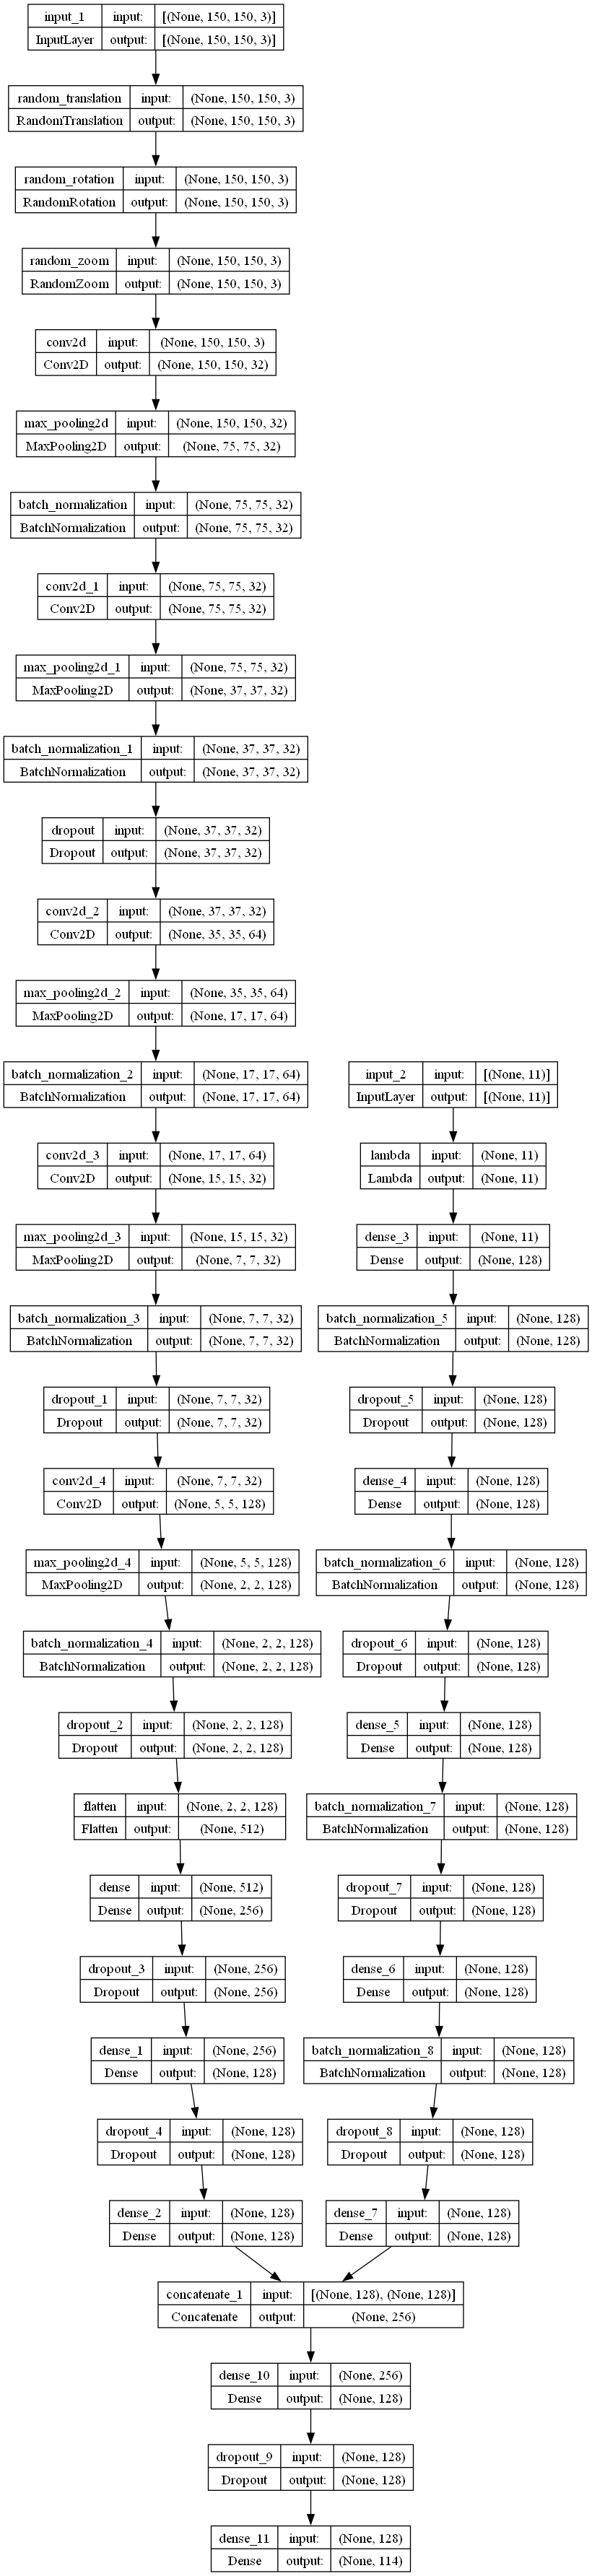

In [ ]:
keras.utils.plot_model(camadas_finais_2, to_file="camadas_finais_2.png", show_shapes=True)

In [ ]:
camadas_finais_2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 random_translation (Random  (None, 150, 150, 3)          0         ['input_1[0][0]']             
 Translation)                                                                                     
                                                                                                  
 random_rotation (RandomRot  (None, 150, 150, 3)          0         ['random_translation[0][0]']  
 ation)                                                                                           
                                                                                            

#### Compilar Modelo

In [ ]:
optimizer_modelo_2_inputs_com_dropout = Adam(learning_rate=0.0001)

In [ ]:
camadas_finais_2.compile(optimizer=optimizer_modelo_2_inputs_com_dropout, loss="categorical_crossentropy", metrics=["accuracy", F1Score(average="weighted", threshold=None, name="f1_score_weighted", dtype=None)])

In [ ]:
callbacks_2 = [
    ModelCheckpoint(
        monitor = "val_loss", 
        filepath="models_multi_input\\modelo_2_inputs_val_loss_good_com_dropout.keras",
        verbose=1,
        save_best_only=True,
    ),
    ModelCheckpoint(
        monitor = "val_f1_score_weighted",
        filepath="models_multi_input\\modelo_2_inputs_val_f1_score_good_com_dropout.keras",
        save_best_only=True,
    )
]

### Treinar Modelo

In [ ]:
historia2 = camadas_finais_2.fit(
    x=[X_fotografias_train, X_dados_medicos_train], # inputs para o modelo. como o modelo foi compilado como [imagens, dados tabela] , os dados têm de ser passados na mesma ordem
    y=y_train,
    validation_data=([X_fotografias_val, X_dados_medicos_val], y_val),
    epochs = 100,
    callbacks= callbacks_2,
    batch_size=32
    )

Epoch 1/100
349/350 [============================>.] - ETA: 0s - loss: 2.4670 - accuracy: 0.3492 - f1_score_weighted: 0.3339
Epoch 1: val_loss improved from 2.91913 to 2.85048, saving model to models_multi_input\modelo_2_inputs_val_loss_good_com_dropout.keras
350/350 [==============================] - 62s 159ms/step - loss: 2.4667 - accuracy: 0.3492 - f1_score_weighted: 0.3339 - val_loss: 2.8505 - val_accuracy: 0.2980 - val_f1_score_weighted: 0.2673
Epoch 2/100
349/350 [============================>.] - ETA: 0s - loss: 2.3929 - accuracy: 0.3730 - f1_score_weighted: 0.3564
Epoch 2: val_loss did not improve from 2.85048
350/350 [==============================] - 49s 141ms/step - loss: 2.3934 - accuracy: 0.3730 - f1_score_weighted: 0.3564 - val_loss: 2.9169 - val_accuracy: 0.2763 - val_f1_score_weighted: 0.2500
Epoch 3/100
349/350 [============================>.] - ETA: 0s - loss: 2.3814 - accuracy: 0.3674 - f1_score_weighted: 0.3519
Epoch 3: val_loss did not improve from 2.85048
350/350 

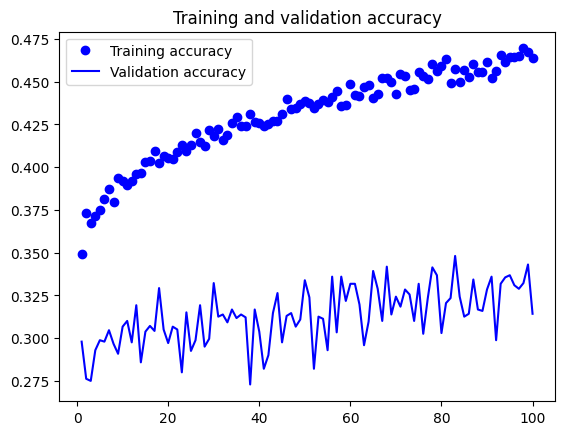

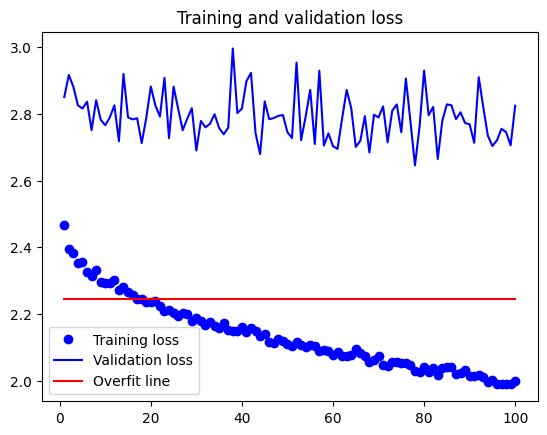

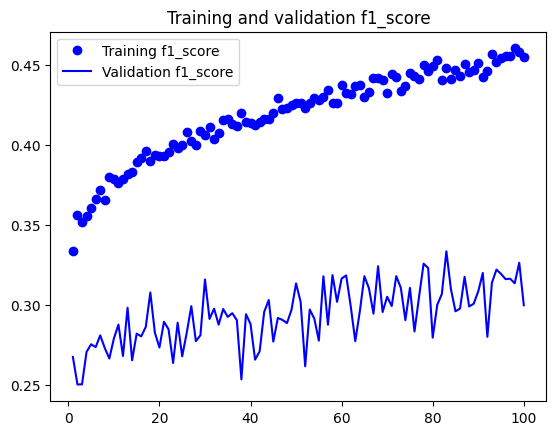

In [ ]:
acc = historia2.history['accuracy']
f1_score = historia2.history['f1_score_weighted']
val_acc = historia2.history['val_accuracy']
val_f1_score = historia2.history['val_f1_score_weighted']
loss = historia2.history['loss']
val_loss = historia2.history['val_loss']




epochs = range(1, len(acc) + 1)

treshold = [min(val_loss)-0.4 for _ in epochs]


plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, treshold, 'r', label="Overfit line")
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, f1_score, 'bo', label='Training f1_score')
plt.plot(epochs, val_f1_score, 'b', label='Validation f1_score')
plt.title('Training and validation f1_score')
plt.legend()


plt.show()

In [ ]:
camadas_finais_2.evaluate([X_fotografias_test, X_dados_medicos_test], y_test)

75/75 [==============================] - 6s 52ms/step - loss: 2.8115 - accuracy: 0.3212 - f1_score_weighted: 0.3090


[2.811450719833374, 0.32121971249580383, 0.30895644426345825]

In [ ]:
loaded_model_2 = load_model("models_multi_input\\modelo_2_inputs_val_loss_good_com_dropout.keras", safe_mode=False,custom_objects={"custom_min_max": custom_min_max})
loaded_model_2.evaluate([X_fotografias_test, X_dados_medicos_test], y_test)

75/75 [==============================] - 4s 35ms/step - loss: 2.6344 - accuracy: 0.3513 - f1_score_weighted: 0.3366


[2.634415626525879, 0.3512949049472809, 0.3366399109363556]

In [ ]:
predictions = loaded_model_2.predict([X_fotografias_test, X_dados_medicos_test])

75/75 [==============================] - 5s 39ms/step


In [ ]:
testar_uma_cena = predictions.argmax(axis=1)
predictions_com_nome = le.inverse_transform(testar_uma_cena)

In [ ]:
valores_verdadeiros = df_for_testing_structured[["label", "npz_path"]]

In [ ]:
valores_verdadeiros["label"] = le.inverse_transform(valores_verdadeiros["label"])

C:\Users\joaop\AppData\Local\Temp\ipykernel_8832\3729752066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores_verdadeiros["label"] = le.inverse_transform(valores_verdadeiros["label"])


In [ ]:
valores_verdadeiros["predicted_values"] = predictions_com_nome

C:\Users\joaop\AppData\Local\Temp\ipykernel_8832\827055647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores_verdadeiros["predicted_values"] = predictions_com_nome


In [ ]:
valores_verdadeiros.drop("npz_path", axis=1, inplace=True)
valores_verdadeiros["iguais_ou_diferentes"] = valores_verdadeiros["label"] == valores_verdadeiros["predicted_values"]


C:\Users\joaop\AppData\Local\Temp\ipykernel_8832\2934802635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores_verdadeiros.drop("npz_path", axis=1, inplace=True)
C:\Users\joaop\AppData\Local\Temp\ipykernel_8832\2934802635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores_verdadeiros["iguais_ou_diferentes"] = valores_verdadeiros["label"] == valores_verdadeiros["predicted_values"]


,label,predicted_values,iguais_ou_diferentes
0,psoriasis,psoriasis,True
1,sarcoidosis,pityriasis rubra pilaris,False
2,tuberous sclerosis,ichthyosis vulgaris,False
3,melanoma,superficial spreading melanoma ssm,False
4,photodermatoses,psoriasis,False
...,...,...,...
2389,urticaria pigmentosa,acne vulgaris,False
2390,psoriasis,acne vulgaris,False
2391,scabies,scabies,True
2392,papilomatosis confluentes and reticulate,papilomatosis confluentes and reticulate,True


In [ ]:
dicio_pseudo_confusion_matrix = {}
labels_unicos = valores_verdadeiros["label"].unique()

for label_unico in labels_unicos:
    dicio_pseudo_confusion_matrix[label_unico] = {}
    pred_counts = valores_verdadeiros[valores_verdadeiros["label"] == label_unico]["predicted_values"].value_counts()
    for label_unico_2 in labels_unicos:
        if label_unico_2 in pred_counts:
            dicio_pseudo_confusion_matrix[label_unico][label_unico_2] = pred_counts[label_unico_2]
        else:
            dicio_pseudo_confusion_matrix[label_unico][label_unico_2] = 0


In [ ]:
exemplos_no_treino = df_for_training["label"].value_counts()

In [ ]:
def taxa_erro(dicionario, exemplos):
    dicio_valores = dicionario.copy()
    taxa_de_erro_dic = {}

    for key, value in dicio_valores.items():
        valores = dicio_valores[key]
        total = sum(valores.values())
        if key in valores.keys():
            del valores[key]
        taxa_de_erro= sum(valores.values())/total
        # obter a key com o valor maior
        biggest_key = max(valores, key=valores.get)
        vezes_que_errou = sum(valores.values())
        vezes_que_acertou = total - vezes_que_errou
        vezes_que_errou_na_mais_errada = valores[biggest_key]
        exemplos_durante_treino_errada = exemplos[biggest_key]
        exemplos_treino_classe_atual = exemplos[key]
        taxa_de_erro_dic[key] = {
            f"exemplos_treino_classe_{key}":exemplos_treino_classe_atual,
            "vezes_que_acertou":vezes_que_acertou,
            "taxa_de_erro": taxa_de_erro, 
            "vezes_que_errou": vezes_que_errou, 
            "classe_mais_errada":biggest_key,
            "vezes_classe_mais_errada": vezes_que_errou_na_mais_errada,
            f"treino_exemplos_classe_{biggest_key}":exemplos_durante_treino_errada}
        # print(taxa_de_erro_dic)
    return taxa_de_erro_dic
dicio_erros = taxa_erro(dicio_pseudo_confusion_matrix,exemplos_no_treino)
dicio_erros

{'psoriasis': {'exemplos_treino_classe_psoriasis': 435,
  'vezes_que_acertou': 38,
  'taxa_de_erro': 0.5957446808510638,
  'vezes_que_errou': 56,
  'classe_mais_errada': 'pityriasis rubra pilaris',
  'vezes_classe_mais_errada': 6,
  'treino_exemplos_classe_pityriasis rubra pilaris': 190},
 'sarcoidosis': {'exemplos_treino_classe_sarcoidosis': 236,
  'vezes_que_acertou': 7,
  'taxa_de_erro': 0.8627450980392157,
  'vezes_que_errou': 44,
  'classe_mais_errada': 'lupus erythematosus',
  'vezes_classe_mais_errada': 5,
  'treino_exemplos_classe_lupus erythematosus': 281},
 'tuberous sclerosis': {'exemplos_treino_classe_tuberous sclerosis': 95,
  'vezes_que_acertou': 11,
  'taxa_de_erro': 0.45,
  'vezes_que_errou': 9,
  'classe_mais_errada': 'neurofibromatosis',
  'vezes_classe_mais_errada': 3,
  'treino_exemplos_classe_neurofibromatosis': 131},
 'melanoma': {'exemplos_treino_classe_melanoma': 169,
  'vezes_que_acertou': 25,
  'taxa_de_erro': 0.3055555555555556,
  'vezes_que_errou': 11,
  'cl

In [ ]:
dicio_final = dict(sorted(dicio_erros.items(), key=lambda item:item[1]['taxa_de_erro'], reverse=True))
dicio_final

{'xanthomas': {'exemplos_treino_classe_xanthomas': 34,
  'vezes_que_acertou': 0,
  'taxa_de_erro': 1.0,
  'vezes_que_errou': 7,
  'classe_mais_errada': 'pityriasis rubra pilaris',
  'vezes_classe_mais_errada': 2,
  'treino_exemplos_classe_pityriasis rubra pilaris': 190},
 'lupus subacute': {'exemplos_treino_classe_lupus subacute': 72,
  'vezes_que_acertou': 0,
  'taxa_de_erro': 1.0,
  'vezes_que_errou': 16,
  'classe_mais_errada': 'allergic contact dermatitis',
  'vezes_classe_mais_errada': 3,
  'treino_exemplos_classe_allergic contact dermatitis': 294},
 'urticaria pigmentosa': {'exemplos_treino_classe_urticaria pigmentosa': 78,
  'vezes_que_acertou': 0,
  'taxa_de_erro': 1.0,
  'vezes_que_errou': 17,
  'classe_mais_errada': 'papilomatosis confluentes and reticulate',
  'vezes_classe_mais_errada': 5,
  'treino_exemplos_classe_papilomatosis confluentes and reticulate': 105},
 'striae': {'exemplos_treino_classe_striae': 46,
  'vezes_que_acertou': 0,
  'taxa_de_erro': 1.0,
  'vezes_que_e

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

In [ ]:
# make a df where the columns are the true labels, the index of rows the predicted labels and the cells the predictions
df_confusion_matrix = pd.DataFrame(cm, columns=le.classes_, index=le.classes_)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize

In [ ]:
n_claases = 114

In [ ]:
predicted_labels = predictions.argmax(axis=-1)

predicted_labels_binary = label_binarize(predicted_labels, classes=np.arange(n_claases))

In [ ]:
predicted_labels_binary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
value_f1 = f1_score(y_test, predicted_labels_binary, average="weighted")

In [ ]:
value_f1

0.33803671455330336